In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [76]:
import torch
from torch import nn
from sklearn.datasets import load_breast_cancer

data=load_breast_cancer()
dir(data)

feature_names=data.feature_names
X=data.data
y=data.target
y

target_names=data.target_names


from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

len(X_train),len(X_test),len(y_train),len(y_test)


# len(data.feature_names)
# data.feature_names

(455, 114, 455, 114)

In [77]:
X_train.shape

#kichu kaj baki ache

X_train=torch.tensor(X_train,dtype=torch.float32)
X_train
X_test=torch.tensor(X_test,dtype=torch.float32)

y_train=torch.tensor(y_train,dtype=torch.float32)

y_test=torch.tensor(y_test,dtype=torch.float32)

len(y_test)


114

In [73]:
len(X_train),len(X_test),len(y_train),len(y_test)


(455, 114, 455, 455)

In [43]:
class BreastCancerV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=nn.Linear(in_features=30,out_features=100)
        self.layer2=nn.Linear(in_features=100,out_features=100)
        self.layer3=nn.Linear(in_features=100,out_features=1)
    def forward(self, x):
        return self.layer3(self.layer2(self.layer1(x)))
    

In [44]:
model_0=BreastCancerV0()
model_0



BreastCancerV0(
  (layer1): Linear(in_features=30, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=100, bias=True)
  (layer3): Linear(in_features=100, out_features=1, bias=True)
)

In [29]:
import matplotlib.pyplot as plt
# from matplotlib.pyplot 

# plt.scatter()


TypeError: scatter() missing 1 required positional argument: 'y'

In [33]:
y.shape

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [106]:
#loss function

loss_fn=nn.BCEWithLogitsLoss()

optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)


In [71]:
len(y_test)
X_train.shape
len(y_test),len(res)

(455, 114)

In [83]:
y_logits=model_0(X_test)
y_logits

loss=loss_fn(y_test,y_logits.squeeze())

loss



tensor(17.4141, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [80]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [84]:
accuracy_fn(y_test,y_logits)


0.0

In [92]:

y_pred=torch.round(torch.sigmoid(y_logits))
accuracy_fn(y_test,y_pred.squeeze())
y_test.shape,y_pred.squeeze().shape


(torch.Size([114]), torch.Size([114]))

Building training amd testing loop


In [116]:



torch.manual_seed(42)

epochs=100

for i in range(epochs):
    model_0.train()
    y_logits=model_0(X_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))


    loss=loss_fn(y_pred,y_train)
    acc=accuracy_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_0.eval()


    with torch.inference_mode():
        y_logits=model_0(X_test).squeeze()
        y_pred=torch.round(torch.sigmoid(y_logits))
        loss1=loss_fn(y_pred,y_test)
        acc1=accuracy_fn(y_pred,y_test)

    if i%20==0:
        print(f"train loss= {loss} | test loss ={loss1} | train accuracy = {acc} | test accuracy = {acc1} ")
        
    



train loss= 0.6931473016738892 | test loss =0.6931471824645996 | train accuracy = 37.142857142857146 | test accuracy = 37.719298245614034 
train loss= 0.6931473016738892 | test loss =0.6931471824645996 | train accuracy = 37.142857142857146 | test accuracy = 37.719298245614034 
train loss= 0.6931473016738892 | test loss =0.6931471824645996 | train accuracy = 37.142857142857146 | test accuracy = 37.719298245614034 
train loss= 0.6931473016738892 | test loss =0.6931471824645996 | train accuracy = 37.142857142857146 | test accuracy = 37.719298245614034 
train loss= 0.6931473016738892 | test loss =0.6931471824645996 | train accuracy = 37.142857142857146 | test accuracy = 37.719298245614034 


***Make prediction and evalaution model with helper function***

In [117]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10201x2 and 30x100)

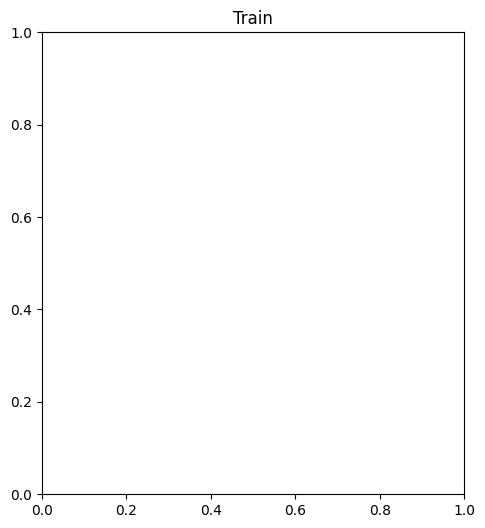

In [118]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)



In [150]:
# # Create some data (same as notebook 01)
# weight = 0.7
# bias = 0.3
# start = 0
# end = 1
# step = 0.01

# # Create data
# X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
# y_regression = weight * X_regression + bias # linear regression formula

# # Check the data
# print(len(X_regression))
# X_regression[:5], y_regression[:5]

# X_regression.shape, y_regression.shape
import torch.nn as nn

***Build with RELU***


In [194]:
class BreastCancerV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=nn.Linear(in_features=30,out_features=100)
        nn.ReLU()
        self.layer2=nn.Linear(in_features=100,out_features=100)
        nn.ReLU()
        self.layer3=nn.Linear(in_features=100,out_features=1)
        nn.ReLU()
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x


# class BreastCancerV1(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.layer1 = nn.Linear(30, 100)
#         self.layer2 = nn.Linear(100, 100)
#         self.layer3 = nn.Linear(100, 1)
#         self.relu = nn.ReLU()
#         self.dropout = nn.Dropout(0.5)
#         self.bn1 = nn.BatchNorm1d(100)
#         self.bn2 = nn.BatchNorm1d(100)

#     def forward(self, x):
#         x = self.relu(self.bn1(self.layer1(x)))
#         x = self.dropout(x)
#         x = self.relu(self.bn2(self.layer2(x)))
#         x = self.dropout(x)
#         x = torch.sigmoid(self.layer3(x))
#         return x


In [195]:
model_1=BreastCancerV1()
model_1

BreastCancerV1(
  (layer1): Linear(in_features=30, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=100, bias=True)
  (layer3): Linear(in_features=100, out_features=1, bias=True)
)

In [196]:
loss_fn=nn.BCEWithLogitsLoss()

optimizer=torch.optim.Adam(params=model_1.parameters(),lr=0.01)

train loss= 0.037100113928318024 | test loss =0.10899422317743301 | train accuracy = 99.12087912087912 | test accuracy = 95.6140350877193 
train loss= 0.03729860112071037 | test loss =0.08258792757987976 | train accuracy = 98.68131868131869 | test accuracy = 96.49122807017544 
train loss= 0.42520201206207275 | test loss =0.5509951114654541 | train accuracy = 81.97802197802197 | test accuracy = 71.05263157894737 
train loss= 0.13860055804252625 | test loss =0.06116199493408203 | train accuracy = 94.06593406593406 | test accuracy = 97.36842105263158 
train loss= 0.13273781538009644 | test loss =0.0606410913169384 | train accuracy = 94.06593406593406 | test accuracy = 97.36842105263158 


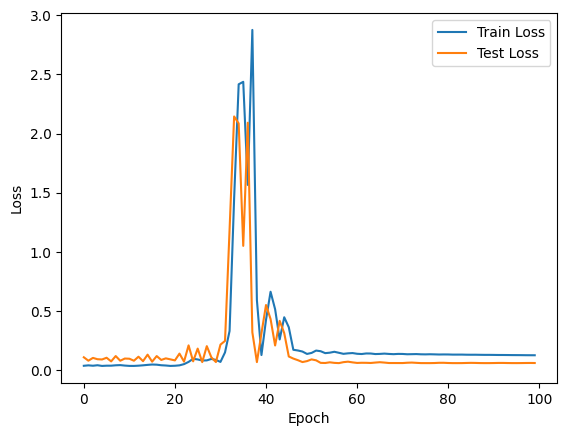

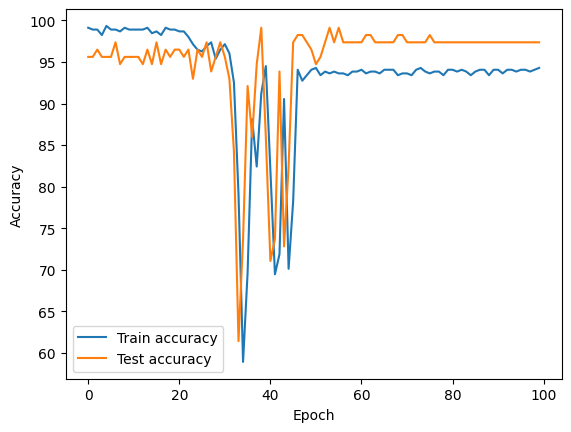

In [226]:
loss1_train=[]
acc1_train=[]

loss2=[]
acc2=[]


# torch.manual_seed(42)

epochs=100

for i in range(epochs):
    model_1.train()
    y_logits=model_1(X_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))
    


    loss=loss_fn(y_logits,y_train)
    loss1_train.append(loss.item())
    acc=accuracy_fn(y_pred,y_train)
    acc1_train.append(acc)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_0.eval()


    with torch.inference_mode():
        y_logits=model_1(X_test).squeeze()
        y_pred=torch.round(torch.sigmoid(y_logits))
        loss1=loss_fn(y_logits,y_test)
        loss2.append(loss1.item())
        acc1=accuracy_fn(y_pred,y_test)
        acc2.append(acc1)

    if i%20==0:
        print(f"train loss= {loss} | test loss ={loss1} | train accuracy = {acc} | test accuracy = {acc1} ")
        
    
plt.plot(range(epochs), loss1_train, label="Train Loss")
plt.plot(range(epochs), loss2, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(range(epochs), acc1_train, label="Train accuracy")
plt.plot(range(epochs), acc2, label="Test accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [193]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.01)

epochs = 100

for i in range(epochs):
    # Training
    model_1.train()
    y_logits = model_1(X_train).squeeze()
    loss = loss_fn(y_logits, y_train)

    # Accuracy
    y_pred = torch.round(torch.sigmoid(y_logits))
    acc = accuracy_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Evaluation
    model_1.eval()
    with torch.inference_mode():
        y_logits_test = model_1(X_test).squeeze()
        loss1 = loss_fn(y_logits_test, y_test)

        y_pred_test = torch.round(torch.sigmoid(y_logits_test))
        acc1 = accuracy_fn(y_pred_test, y_test)

    if i % 20 == 0:
        print(f"Epoch {i}: train loss= {loss.item():.4f} | test loss ={loss1.item():.4f} | train acc = {acc:.4f} | test acc = {acc1:.4f}")


Epoch 0: train loss= 0.4723 | test loss =0.4947 | train acc = 92.0879 | test acc = 90.3509
Epoch 20: train loss= 0.4695 | test loss =0.4743 | train acc = 94.5055 | test acc = 95.6140
Epoch 40: train loss= 0.4720 | test loss =0.5058 | train acc = 91.6484 | test acc = 97.3684
Epoch 60: train loss= 0.4704 | test loss =0.4660 | train acc = 93.4066 | test acc = 93.8596
Epoch 80: train loss= 0.4685 | test loss =0.5005 | train acc = 92.9670 | test acc = 98.2456
